In [1]:
import tensorflow as tf

In [2]:
model = tf.keras.models.load_model('models/45_resnet_regression_1')

In [3]:
import PIL
import numpy as np

img_width = 224
img_height = 224

def image_to_tensor(impath):
    img = PIL.Image.open(impath).resize((img_width, img_height))
    img = np.array(img)
    tensor = tf.image.convert_image_dtype(img, dtype=tf.float16, saturate=False, name=None)
    return tensor

def predict_rating(impath):
    img = tf.keras.utils.load_img(impath, target_size=(img_width, img_height))
    img_array = np.array([image_to_tensor(impath)])
    prediction = model.predict(img_array)
    print(prediction)
    prediction = float(prediction[0][0])
    print(f"This person is most likely a {round(prediction, 2)}")

    return img

1/1 [==============================] - 3s 3s/step
[[3.5623207]]
This person is most likely a 3.56


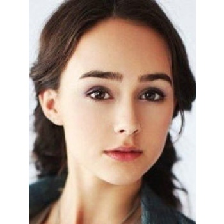

In [4]:
impath = r"data\classification_train_test\test\five\CF609.jpg"

img = predict_rating(impath)
img

In [5]:
img_width = 250
img_height = 250

In [6]:
classification_model = tf.keras.models.load_model('models/resnet_classification_1')

In [7]:
def classify_rating(impath):
    class_names = ["one", "two", "three", "four", "five"]
    img = tf.keras.utils.load_img(impath, target_size=(img_width, img_height))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = classification_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    print(f"This person is most likely a {class_names[np.argmax(score)].upper()}.")
    print(score)
    return img

1/1 [==============================] - 3s 3s/step
This person is most likely a TWO.
tf.Tensor([0.15829355 0.37097907 0.15305345 0.15690169 0.1607722 ], shape=(5,), dtype=float32)


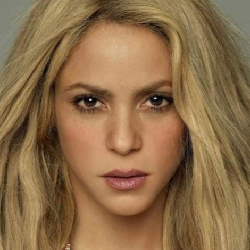

In [8]:
impath = "data/my_images/shakira.jpg"

img = classify_rating(impath)
img

1/1 [==============================] - 0s 276ms/step
This person is most likely a TWO.
tf.Tensor([0.15011984 0.40141964 0.14924856 0.14992836 0.14928362], shape=(5,), dtype=float32)


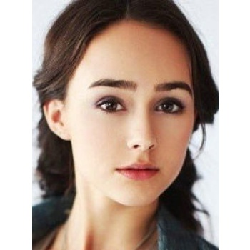

In [9]:
impath = r"data\classification_train_test\test\five\CF609.jpg"

img = classify_rating(impath)
img